In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

from ambiguous_parsing.eval.eval import get_df

In [5]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 
# fol
fol_models_and_paths = [
    ("codegen-350M", "codegen-350M_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T182550.jsonl"),
    ("codegen-2B", "codegen-2B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T182652.jsonl"),
    ("codegen-6B", "codegen-6B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T214101.jsonl"),
    ("codegen-16B", "codegen-16B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T183004.jsonl")
]

lisp_models_and_paths = [
    ("codegen-350M", "codegen-350M_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T140054.jsonl"),
    ("codegen-2B", "codegen-2B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T140125.jsonl"),
    ("codegen-6B", "codegen-6B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T230936.jsonl"),
    ("codegen-16B", "codegen-16B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5/model_outputs.20230412T153030.jsonl")
]







In [22]:
# fol data 
model_order = ['codegen-350M', 'codegen-2B', 'codegen-6B', 'codegen-16B']
fol_test_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_fol/test.jsonl"
fol_eval_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_fol/test_eval.jsonl"
big_df = []
for model_name, path in fol_models_and_paths:
    pred_path = CHECKPOINT_DIR / path
    df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
    df['model'] = model_name
    df['model_order'] = model_order.index(model_name)
    df['is_fol'] = True
    big_df.append(df)

# lisp data 
lisp_test_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_lisp/test.jsonl"
lisp_eval_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_lisp/test_eval.jsonl"
for model_name, path in lisp_models_and_paths:
    pred_path = CHECKPOINT_DIR / path
    df = get_df(lisp_test_path, lisp_eval_path, pred_path, is_fol=False)
    df['model'] = model_name
    df['model_order'] = model_order.index(model_name)
    df['is_fol'] = False
    big_df.append(df)

big_df = pd.concat(big_df)

0 = 0.00 are missing a first output
1 = 0.20 are missing a second output
3 = 0.60 are missing a first output
6 = 1.20 are missing a second output
8 = 1.60 are missing a first output
14 = 2.80 are missing a second output
7 = 1.40 are missing a first output
9 = 1.80 are missing a second output
5 = 1.00 are missing a first output
5 = 1.00 are missing a second output
1 = 0.20 are missing a first output
1 = 0.20 are missing a second output
2 = 0.40 are missing a first output
6 = 1.20 are missing a second output
3 = 0.60 are missing a first output
12 = 2.40 are missing a second output


In [16]:
print(big_df.head())

  type                         key  value         model  model_order  is_fol
0   pp  pred_top_1_matches_correct     13  codegen-350M            0    True
1   pp  pred_top_2_matches_correct     13  codegen-350M            0    True
2   pp    pred_top_1_matches_other      4  codegen-350M            0    True
3   pp    pred_top_2_matches_other      4  codegen-350M            0    True
4   pp        pred_top_1_matches_0      0  codegen-350M            0    True


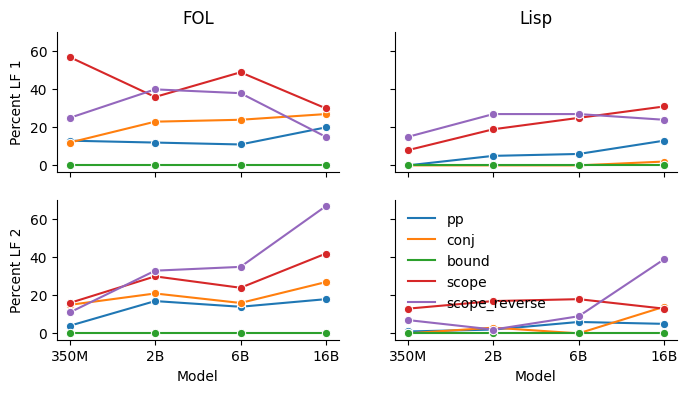

In [33]:
short_models = [x.split("-")[1] for x in model_order]

fig, ax = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)
fol_df = big_df[big_df['is_fol'] == True]
fol_df_match_lf_1 = fol_df[fol_df['key'] == "pred_top_1_matches_correct"]
fol_df_match_lf_2 = fol_df[fol_df['key'] == "pred_top_1_matches_other"]

# fol 
sns.lineplot(data = fol_df_match_lf_1, x = "model_order", y = "value", hue = "type", ax=ax[0,0], marker='o')
sns.lineplot(data = fol_df_match_lf_2, x = "model_order", y = "value", hue = "type", ax=ax[1,0], marker='o')

ax[0,0].set_title("FOL")
ax[1,0].set_xticks(range(len(model_order)), labels = short_models)
ax[1,0].set_xlabel("Model")
ax[0,0].set_ylabel("Percent LF 1")
ax[1,0].set_ylabel("Percent LF 2")
ax[0,0].legend().remove()
ax[1,0].legend().remove()

# lisp 
lisp_df = big_df[big_df['is_fol'] == False]
lisp_df_match_lf_1 = lisp_df[lisp_df['key'] == "pred_top_1_matches_correct"]
lisp_df_match_lf_2 = lisp_df[lisp_df['key'] == "pred_top_1_matches_other"]
sns.lineplot(data = lisp_df_match_lf_1, x = "model_order", y = "value", hue = "type", ax=ax[0,1], marker = "o")
sns.lineplot(data = lisp_df_match_lf_2, x = "model_order", y = "value", hue = "type", ax=ax[1,1], marker = "o")
ax[0,1].set_title("Lisp")
ax[0,1].legend().remove()
ax[1,1].legend(frameon=False)
ax[1,1].set_xticks(range(len(model_order)), labels = short_models)
ax[1,1].set_xlabel("Model")
sns.despine()